In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 77.0 kB/s eta 0:02:08
   ---------------------------------------- 0.0/9.8 MB 77.0 kB/s eta 0:02:08
   ---------------------------------------- 0.0/9.8 MB 77.0 kB/s eta 0:02:08
   ---------------------------------------- 0.0/9.8 MB 77.0 kB/s eta 0:02:08
   ---------------------------------------- 0.0/9.8 MB 65.5 kB/s eta 0:02:30
   ---------------------------------------- 0.0/9.8 MB 65.5 kB/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:\\Users\\satya\\OneDrive\\Desktop\\csv\\sales.csv")
data.head()

,Date,Amount
0,1/1/2000,510
1,2/1/2000,515
2,3/1/2000,530
3,4/1/2000,527
4,5/1/2000,519


In [4]:
data.tail()

,Date,Amount
103,8/1/2008,766
104,9/1/2008,703
105,10/1/2008,644
106,11/1/2008,604
107,12/1/2008,630


In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data

,Date,Amount
0,2000-01-01,510
1,2000-02-01,515
2,2000-03-01,530
3,2000-04-01,527
4,2000-05-01,519
...,...,...
103,2008-08-01,766
104,2008-09-01,703
105,2008-10-01,644
106,2008-11-01,604


In [7]:
data.set_index('Date',inplace=True)
data.head()

,Amount
Date,
2000-01-01,510
2000-02-01,515
2000-03-01,530
2000-04-01,527
2000-05-01,519


<Axes: xlabel='Date'>

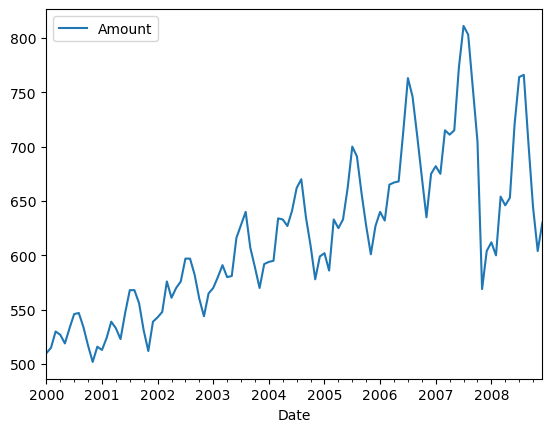

In [8]:
data.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(d):
    result=adfuller(d)
    print("p value -> ",result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Accept the null hypothesis, Data is not stationary ")

In [11]:
adf_test(data['Amount'])

p value ->  0.5644352099925041
Accept the null hypothesis, Data is not stationary 


In [12]:
data['First Diffrence'] = data['Amount']-data['Amount'].shift(1)

In [13]:
data.head()

,Amount,First Diffrence
Date,,
2000-01-01,510,NaN
2000-02-01,515,5.0
2000-03-01,530,15.0
2000-04-01,527,-3.0
2000-05-01,519,-8.0


In [14]:
data['second diffrence'] = data['First Diffrence']-data['First Diffrence'].shift(1)

In [15]:
data.head()

,Amount,First Diffrence,second diffrence
Date,,,
2000-01-01,510,NaN,NaN
2000-02-01,515,5.0,NaN
2000-03-01,530,15.0,10.0
2000-04-01,527,-3.0,-18.0
2000-05-01,519,-8.0,-5.0


In [16]:
adf_test(data['First Diffrence'].dropna())

p value ->  0.07478507605167095
Accept the null hypothesis, Data is not stationary 


In [17]:
adf_test(data['second diffrence'].dropna())

p value ->  3.4877399176947928e-15
Reject the null hypothesis. Data is stationary


In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

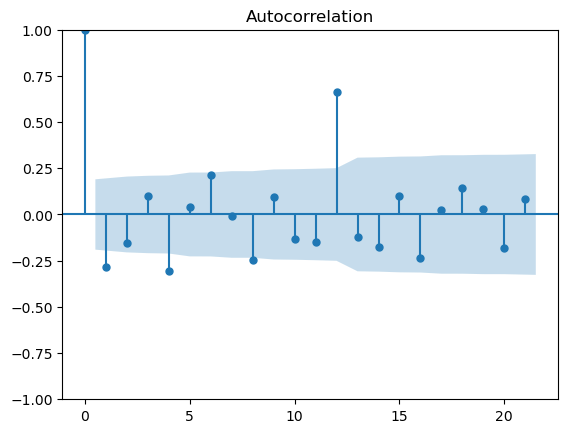

In [19]:
plot1 = plot_acf(data['second diffrence'].dropna())

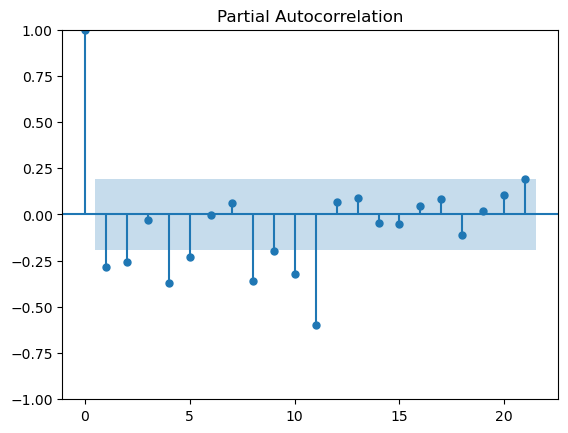

In [20]:
plot2 = plot_pacf(data['second diffrence'].dropna())

In [21]:
data['seasonal difference']=data['Amount']-data['Amount'].shift(12)

In [22]:
data

,Amount,First Diffrence,second diffrence,seasonal difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


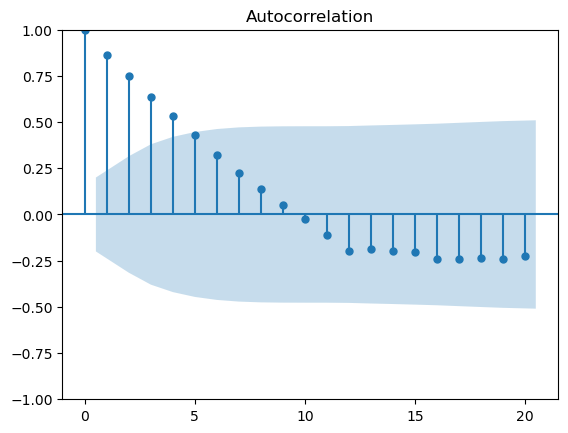

In [23]:
plot = plot_acf(data['seasonal difference'].dropna())

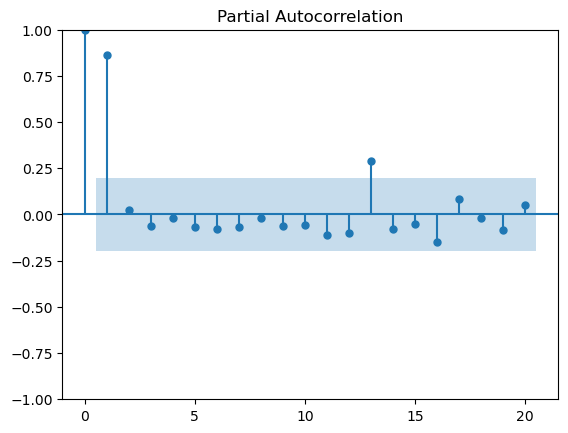

In [24]:
plot4 = plot_pacf(data['seasonal difference'].dropna())

In [25]:
from datetime import datetime

In [26]:
train_data = data

In [27]:
train_data

,Amount,First Diffrence,second diffrence,seasonal difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


In [28]:
from statsmodels.tsa.arima.model import ARIMA
models = ARIMA(train_data['Amount'],order = (17,2,3))
armia_model = models.fit()

In [29]:
predicteda = armia_model.predict(start=datetime(2003,1,1),end = datetime(2008,12,1))

In [30]:
train_data['predicteda_armia']= predicteda

In [31]:
train_data

,Amount,First Diffrence,second diffrence,seasonal difference,predicteda_armia
Date,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.075514
2008-09-01,703,-63.0,-65.0,-51.0,736.167889
2008-10-01,644,-59.0,4.0,-61.0,649.998792


<Axes: xlabel='Date'>

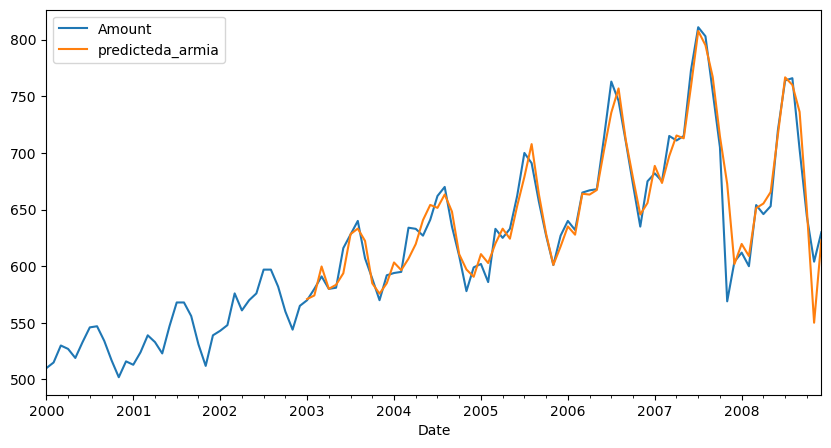

In [32]:
train_data[['Amount','predicteda_armia']].plot(figsize=(10,5))

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
smodel = SARIMAX(train_data['Amount'],order=(2,0,4),seasonal_order=(0,1,0,12))

In [35]:
model = smodel.fit()

In [36]:
predict = model.predict(start=datetime(2003,1,1),end = datetime(2008,12,1))

In [37]:
train_data['predict']= predict

In [38]:
train_data

,Amount,First Diffrence,second diffrence,seasonal difference,predicteda_armia,predict
Date,,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.075514,763.089129
2008-09-01,703,-63.0,-65.0,-51.0,736.167889,722.759849
2008-10-01,644,-59.0,4.0,-61.0,649.998792,664.085812


<Axes: xlabel='Date'>

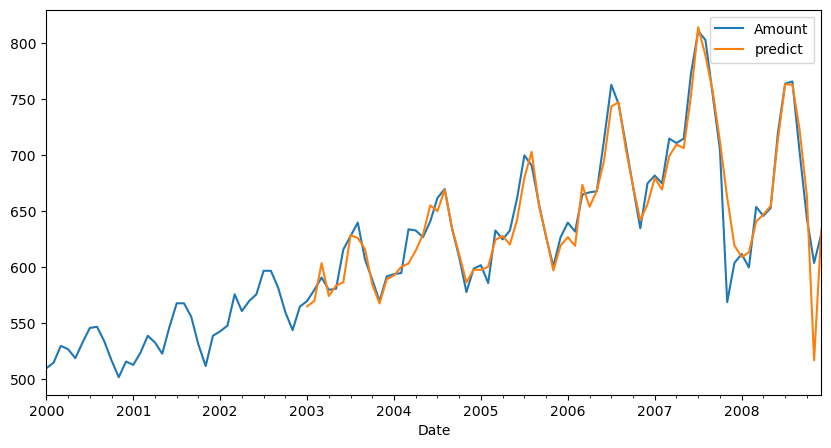

In [39]:
train_data[['Amount','predict']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

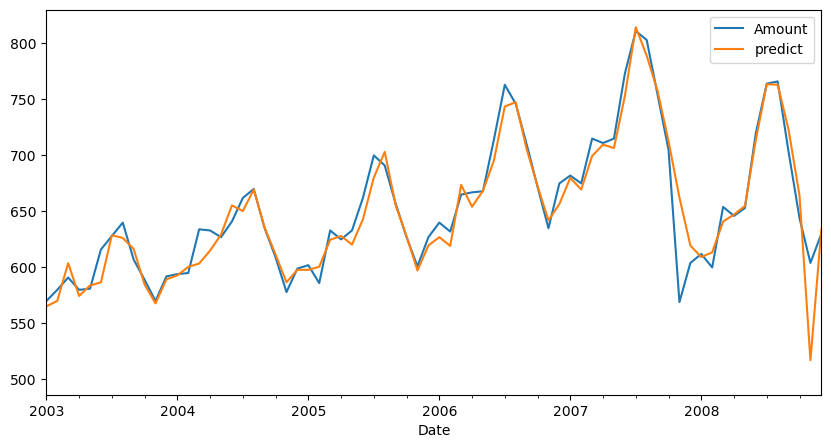

In [40]:
train_data[['Amount','predict']].plot(xlim=['2003-01-01','2008-12-1'],figsize=(10,5))

2009-01-01    646.927681
2009-02-01    626.915528
2009-03-01    685.770004
2009-04-01    679.601765
2009-05-01    686.549354
2009-06-01    752.073175
2009-07-01    793.582643
2009-08-01    792.431051
2009-09-01    725.914089
2009-10-01    663.271190
2009-11-01    619.688958
2009-12-01    642.306024
Freq: MS, Name: predicted_mean, dtype: float64

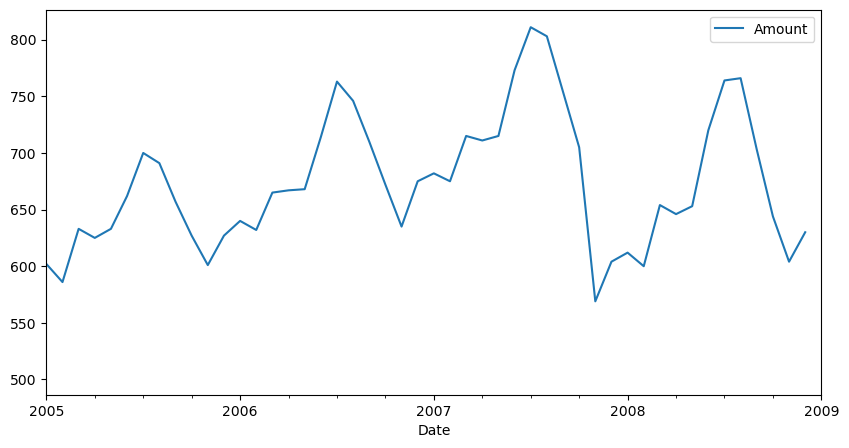

In [41]:
predicted1 = model.predict(start = datetime(2009,1,1),end = datetime(2009,12,1))
train_data['predicted1']=predicted1
train_data[['Amount']].plot(xlim=['2005-01-01','2009-01-01'],figsize=(10,5))
predicted1

<Axes: >

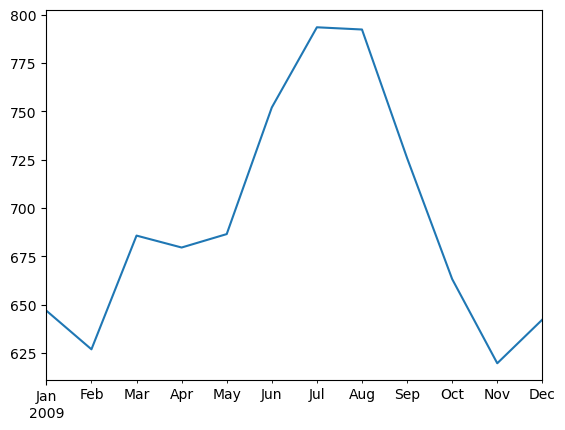

In [42]:
predicted1.plot()